# Welcome to an example Binder

We need `seaborn`, which shall be included it in `requirements.txt` file

In [1]:
import seaborn as sns; sns.set()
import pandas as pd
pd.set_option('max_columns', None)
import re
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('datasets/antropometria-dataset.csv')
df

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,emb,temb,cintura,cadera,sistol,diastol,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.40,4,,98.70,106.0,63.25,53.25,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.10,,,64.00,75.0,70.00,50.00,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.00,4,,67.60,94.3,70.50,41.00,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.50,,,60.60,72.2,71.00,64.00,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.00,4,,113.00,127.0,72.00,53.50,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18635,300116,2,30,VERACRUZ DE IGNACIO DE LA LLAVE,2,73,11,75.80,1,141.15,,,93.00,113.0,221.00,95.50,18:00,1,18:05,1,R3002,5,3,1,7615.607749,305
18636,40253,1,4,CAMPECHE,2,75,0,69.40,1,144.80,,,103.05,113.7,222.25,78.00,18:40,1,18:40,1,M0408,5,3,1,195.314670,45
18637,301099,1,30,VERACRUZ DE IGNACIO DE LA LLAVE,1,86,7,46.75,2,149.20,,,71.35,86.0,230.00,66.00,8:00,3,23:00,1,M3024,2,1,2,1758.912979,302
18638,250801,1,25,SINALOA,2,72,7,59.05,2,142.50,,,99.95,94.8,235.00,100.00,6:02,3,6:02,1,M2512,3,2,1,2354.581350,253


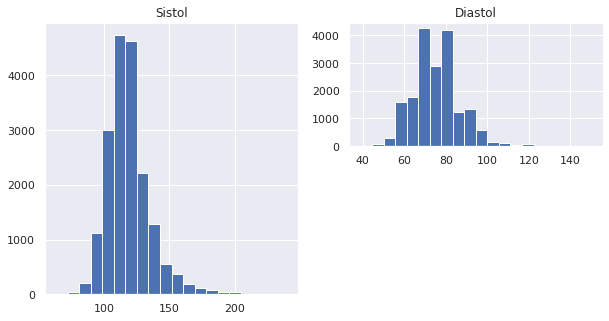

In [3]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(df['sistol'],bins= 20)
plt.title('Sistol')

plt.subplot(2,2,2)
plt.hist(df['diastol'],bins=20)
plt.title('Diastol')

plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


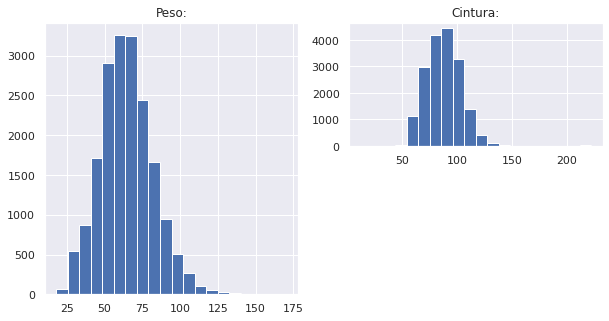

In [4]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(df['peso'], bins=20)
plt.title('Peso:')

plt.subplot(2,2,2)
plt.hist(df['cintura'], bins=20)
plt.title('Cintura:')

plt.show()

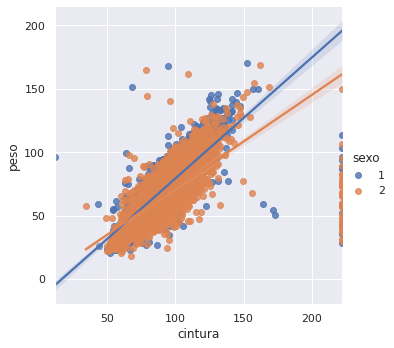

In [5]:
sns.lmplot(x= 'cintura',
          y = 'peso',
           hue='sexo',
          data = df)

plt.show()

In [6]:
import statsmodels.api as sm

model=sm.OLS.from_formula('diastol~sistol+edad+peso+cintura',
                         data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                diastol   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     3812.
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:16:30   Log-Likelihood:                -63952.
No. Observations:               18032   AIC:                         1.279e+05
Df Residuals:                   18027   BIC:                         1.280e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.3297      0.520     39.089      0.000      19.310      21.349
sistol         0.4140      0.004     94.447      0.000       0.405       0.423
edad          -0.0272      0.004     -6.934      0.000      -0.035      -0.020
peso           0.0825      0.006     14.154      0.000       0.071       0.094
cintura        0.0202      0.007      3.072      0.002       0.007       0.033
==============================================================================
Omnibus:                     1031.138   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3722.633
Skew:                           0.189   Prob(JB):                         0.00
Kurtosis:                       5.194   Cond. No.                     1.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
import statsmodels.api as sm

model=sm.OLS.from_formula('diastol~sistol',
                         data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                diastol   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.469e+04
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:16:30   Log-Likelihood:                -66351.
No. Observations:               18640   AIC:                         1.327e+05
Df Residuals:                   18638   BIC:                         1.327e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6843      0.432     54.811      0.000      22.837      24.531
sistol         0.4375      0.004    121.220      0.000       0.430       0.445
==============================================================================
Omnibus:                     1040.446   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4079.429
Skew:                           0.118   Prob(JB):                         0.00
Kurtosis:                       5.280   Cond. No.                         830.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
import statsmodels.api as sm

model=sm.OLS.from_formula('cadera~peso',
                         data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cadera   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                 2.748e+04
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:16:31   Log-Likelihood:                -65165.
No. Observations:               18032   AIC:                         1.303e+05
Df Residuals:                   18030   BIC:                         1.304e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.4600      0.252    228.032      0.000      56.966      57.954
peso           0.6227      0.004    165.771      0.000       0.615       0.630
==============================================================================
Omnibus:                    22321.754   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6875856.023
Skew:                           6.463   Prob(JB):                         0.00
Kurtosis:                      97.786   Cond. No.                         253.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
vars=['entidad','sexo']
df=df[vars]

df[vars].corr()

,entidad,sexo
entidad,1.00000,0.01038
sexo,0.01038,1.00000
